# Importando as Bibliotecas
Importações das bibliotecas utilizadas para a realização do projeto

In [1]:
# Importação das Bibliotecas

import os

import numpy as np
from skimage import util, transform, filters, color, measure, morphology, io, data
from sklearn import model_selection, neighbors, metrics, preprocessing
from sklearn.metrics import classification_report
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
%matplotlib notebook


## Semente Randômica
É definida uma semente padrão, para que quando for executado novamente não se obtenha resultados diferentes.

In [2]:
np.random.seed(393)

## Carregamento dos Datasets
Nesta parte é feito o carregamento dos datasets de treino e de teste.

In [3]:
# Pastas com os conjuntos de treino e teste

path_train = '/home/gabas/Área de Trabalho/Projeto_sin393/mpeg7_4classes_aug_x8_work/Train'

path_test = '/home/gabas/Área de Trabalho/Projeto_sin393/mpeg7_4classes_aug_x8_work/Test'


# Prepara os dados de Treinamento
Percorre as pastas e gera os rótulos de classe para serem usados na classificação e cria uma lista com todas as imagens

In [4]:
# Lista das pastas na pasta de treino
classes_list_train = os.listdir(path_train)

# Lista para cada uma das classes do dataset
list_train_bat = os.listdir(path_train +'/' + 'bat')
list_train_apple = os.listdir(path_train +'/' + 'apple')
list_train_bone = os.listdir(path_train +'/' + 'bone')
list_train_beetle = os.listdir(path_train +'/' + 'beetle')

# Lista com todos os nomes da imagens
list_train_name_full = list()

# Lista com todos os nomes das imagens
list_train_name_full = list_train_bat+list_train_apple+list_train_bone+list_train_beetle



# Prepara os dados de Testes
Percorre as pastas e gera os rótulos de classe para serem usados na classificação e cria uma lista com todas as imagens

In [5]:
# Lista das pastas na pasta de testes
classes_list_test = os.listdir(path_test)

# Lista para cada uma das classes do dataset
list_test_bat = os.listdir(path_test +'/' + 'bat')
list_test_apple = os.listdir(path_test +'/' + 'apple')
list_test_bone = os.listdir(path_test +'/' + 'bone')
list_test_beetle = os.listdir(path_test +'/' + 'beetle')

# Lista com todos os nomes da imagens
list_test_name_full = list()

# Lista com todos os nomes das imagens
list_test_name_full = list_test_bat+list_test_apple+list_test_bone+list_test_beetle


# Carrega as imagens de treino
Percorre cada classe e carrega as imagens e seus rótulos

In [6]:
# Lista com as imagens no dataset de treino
image_list_train = list()

# Lista com os rótulos das imagens de treino
label_list_train = list()

# Lista com os nomes das imagens de treino
filename_list_train_full = list()

# Anda pela classe bat 
for image in list_train_bat:
    caminho = path_train + '/bat/' + image
    # Carrega a imagem
    img_temp = io.imread(caminho)
        
        # Adiciona a imagem a lista de imagens de treino
    image_list_train.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos de treino
    label_list_train.append('bat')
        
        # Adiciona o nome da imagem à uma lista de treino (para fins de visualização)
    filename_list_train_full.append(image)
    
    
# Anda pela classe apple
for image in list_train_apple:
    caminho = path_train + '/apple/' + image
    # Carrega a imagem
    img_temp = io.imread(caminho)
        
        # Adiciona a imagem a lista de imagens de treino
    image_list_train.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos de treino
    label_list_train.append('apple')
        
        # Adiciona o nome da imagem à uma lista de treino (para fins de visualização)
    filename_list_train_full.append(image)

    
    
# Anda pela classe bone
for image in list_train_bone:
    caminho = path_train + '/bone/' + image
    # Carrega a imagem
    img_temp = io.imread(caminho)
        
        # Adiciona a imagem a lista de imagens de treino
    image_list_train.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos de treino
    label_list_train.append('bone')
        
        # Adiciona o nome da imagem à uma lista de treino (para fins de visualização)
    filename_list_train_full.append(image)

    
    
# Anda pela classe beetle
for image in list_train_beetle:
    caminho = path_train + '/beetle/' + image
    # Carrega a imagem
    img_temp = io.imread(caminho)
        
        # Adiciona a imagem a lista de imagens de treino
    image_list_train.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos de treino
    label_list_train.append('beetle')
        
        # Adiciona o nome da imagem à uma lista de treino (para fins de visualização)
    filename_list_train_full.append(image)

    
    
# Imprime os rótulos de treino       
#print(label_list_train)



# Carrega as imagens de teste
Percorre cada classe e carrega as imagens e seus rótulos

In [7]:
# Lista com as imagens no dataset de teste
image_list_test = list()

# Lista com os rótulos das imagens de teste
label_list_test = list()

# Lista com os nomes das imagens de teste
filename_list_test_full = list()

# Anda pela classe bat 
for image in list_test_bat:
    caminho = path_test + '/bat/' + image
    # Carrega a imagem
    img_temp = io.imread(caminho)
        
        # Adiciona a imagem a lista de imagens de testes
    image_list_test.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos de testes
    label_list_test.append('bat')
        
        # Adiciona o nome da imagem à uma lista de teste (para fins de visualização)
    filename_list_test_full.append(image)
    
    
# Anda pela classe apple
for image in list_test_apple:
    caminho = path_test + '/apple/' + image
    # Carrega a imagem
    img_temp = io.imread(caminho)
        
        # Adiciona a imagem a lista de imagens de teste
    image_list_test.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos de teste
    label_list_test.append('apple')
        
        # Adiciona o nome da imagem à uma lista de teste (para fins de visualização)
    filename_list_test_full.append(image)

    
    
# Anda pela classe bone
for image in list_test_bone:
    caminho = path_test + '/bone/' + image
    # Carrega a imagem
    img_temp = io.imread(caminho)
        
        # Adiciona a imagem a lista de imagens de teste
    image_list_test.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos de teste
    label_list_test.append('bone')
        
        # Adiciona o nome da imagem à uma lista de teste (para fins de visualização)
    filename_list_test_full.append(image)

    
    
# Anda pela classe beetle
for image in list_test_beetle:
    caminho = path_test + '/beetle/' + image
    # Carrega a imagem
    img_temp = io.imread(caminho)
        
        # Adiciona a imagem a lista de imagens de teste
    image_list_test.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos de teste
    label_list_test.append('beetle')
        
        # Adiciona o nome da imagem à uma lista de teste (para fins de visualização)
    filename_list_test_full.append(image)

    
    
# Imprime os rótulos de teste      
#print(label_list_test)



# Indice de Classes de Treino
Cria os indices de classes a partir dos rótulos de classe

In [8]:
# Indices das classes dos objetos do dataset de treino
_, _, label_list_id_train = np.unique(label_list_train, return_index=True, return_inverse=True)

#print(label_list_id_train)


# Indice de Classes de Teste
Cria os indices de classes a partir dos rótulos de classe

In [9]:
# Indices das classes dos objetos do dataset de treino
_, _, label_list_id_test = np.unique(label_list_test, return_index=True, return_inverse=True)
#print(label_list_id_train)

# Visualização de Algumas imagens
Plota algumas images das classes do dataset

<IPython.core.display.Javascript object>


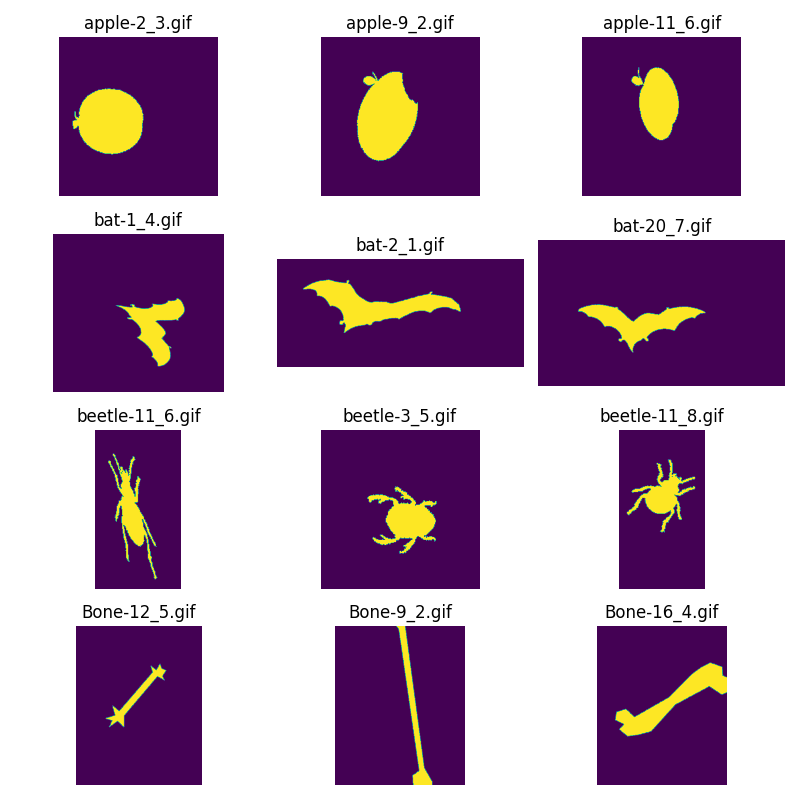

In [10]:
# Seleciona apenas as primeiras N imagens de cada classe de treino
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes de treino
for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list_train[j] for j in np.where(label_list_id_train==i)[0][:3]]
    filename_list_temp += [filename_list_train_full[j] for j in np.where(label_list_id_train==i)[0][:3]]

fig, ax  = plt.subplots(4, 3, figsize=(8, 8))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//3, i%3].imshow(image, vmin=0, vmax=255)
    ax[i//3, i%3].set_title(str(filename))
    ax[i//3, i%3].axis('off')

fig.tight_layout()
plt.show()

# Informações das Imagens
Algumas funções para imprimir informações acerca das imagens

In [11]:
def print_info(img):
    print(f'Tamanho da imagem: {img.shape}')
    print(f'Número de dimensões: {img.ndim}')
    print(f'Tipo de dados: {img.dtype}')
    print()
    print(f'Valor mínimo: {img.min()}')
    print(f'Valor máximo: {img.max()}')
    print(f'Média da imagem: {img.mean():.4f}')
    print(f'Desvio padrão da imagem: {img.std():.4f}')

In [12]:
def tamanho_img(img,name):
    height, width = img.shape
    print("O nome da imagem é: ", name)
    print("A altura da imagem é: ", height) 
    print("A largura da imagem é: ", width) 
    tam_pixels = width*height
    print("Tamanho: ", tam_pixels)

# Extração das Características das Imagens
Extração de características das imagens usando método regionprops da Skimage

## Características usadas
Foram extraídas muitas características para melhor escolha do que usar na classificação

In [13]:
# Nomes das caracteristicas extraídas
features = ['area', 'major_axis', 'minor_axis', 'solidity', 'eccentricity','extent','area_bbox', 'euler_number','perimeter_crofton', 'area_convex','area_filled']


## Extração das Características de Treino

In [14]:
# Lista com todas as caracteristicas
feature_mat_train = list()

# Listas separadas de caracteristicas de cada classe
feature_mat_train_apple = list()
feature_mat_train_beetle = list()
feature_mat_train_bat = list()
feature_mat_train_bone = list()

for i,(image,label) in enumerate(zip(image_list_train,label_list_train)):
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(image)
    
    # Itera pelas propriedades computadas
    for prop in props:
        
        # Prop. 0: Area
        area = prop.area
       
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity = prop.solidity 
        
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity 
        
        #Prop. 5: Extent
        extent = prop.extent
        
        #Prop. 6: Area_bbox
        area_bbox  = prop.area_bbox 
        
        #Prop. 7: Euler_number
        euler_number = prop.euler_number
        
        #Prop. 8: Perimeter_crofton
        perimeter_crofton = prop.perimeter_crofton
        
        #Prop. 9: Area_convex
        area_convex = prop.area_convex
        
        #Prop. 10: Area_filled
        area_filled = prop.area_filled


        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity, extent, area_bbox, euler_number,perimeter_crofton,area_convex,area_filled]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat_train.append(feature_list)
                                 
    #Adiciona separadamente as caracteriscas de cada classe                    
    if(label == 'bat'):
        feature_mat_train_bat.append(feature_list)
    if(label == 'beetle'):
        feature_mat_train_beetle.append(feature_list)
    if(label == 'apple'):
        feature_mat_train_apple.append(feature_list)
    if(label == 'bone'):
        feature_mat_train_bone.append(feature_list)
        


## Extração das Características de Teste

In [15]:
# Lista com todas as caracteristicas
feature_mat_test = list()

for i,(image,label) in enumerate(zip(image_list_test,label_list_test)):
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(image)
    
    # Itera pelas propriedades computadas
    for prop in props:
        
        # Prop. 0: Area
        area = prop.area
       
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity = prop.solidity 
        
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity 
        
        #Prop. 5: Extent
        extent = prop.extent
        
        #Prop. 6: Area_bbox
        area_bbox  = prop.area_bbox 
        
        #Prop. 7: Euler_number
        euler_number = prop.euler_number
        
        #Prop. 8: Perimeter_crofton
        perimeter_crofton = prop.perimeter_crofton
        
        #Prop. 9: Area_convex
        area_convex = prop.area_convex
        
        #Prop. 10: Area_filled
        area_filled = prop.area_filled


        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity, extent, area_bbox, euler_number,perimeter_crofton,area_convex,area_filled]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat_test.append(feature_list)

# Informações Acerca das Características de Treino
Faz uma conversão para numpy, gera algumas estatíticas e faz a plotagem das características

In [16]:
# Converte a lista de caracteristicas de treino para um arranjo NumPy
feature_map_train = np.array(feature_mat_train)


In [17]:
df = pd.DataFrame(feature_map_train, columns=features)
df['class'] = label_list_train
styles = [dict(selector="caption",props=[("text-align", "center"),("font-size", "150%"),("color", 'black')])]
df = df.style.set_caption("Características de Todas as Imagens").set_table_styles(styles)

display(df)


,area,major_axis,minor_axis,solidity,eccentricity,extent,area_bbox,euler_number,perimeter_crofton,area_convex,area_filled,class
0,23944.000000,252.262154,191.560711,0.656468,0.650657,0.380063,63000.000000,0.000000,1098.648979,36474.000000,23944.000000,bat
1,26965.000000,465.133365,123.772708,0.574910,0.963945,0.354057,76160.000000,0.000000,1237.637367,46903.000000,26965.000000,bat
2,15751.000000,316.527360,100.286570,0.651676,0.948481,0.360864,43648.000000,1.000000,891.275134,24170.000000,15751.000000,bat
3,31136.000000,423.238145,189.785322,0.588471,0.893827,0.251032,124032.000000,-2.000000,1467.413391,52910.000000,31136.000000,bat
4,7133.000000,208.528993,68.990425,0.679592,0.943686,0.309485,23048.000000,0.000000,538.011767,10496.000000,7133.000000,bat
5,14994.000000,324.465003,106.638273,0.561216,0.944449,0.217696,68876.000000,0.000000,1042.186019,26717.000000,14995.000000,bat
6,51750.000000,425.349638,220.158828,0.716144,0.855626,0.389514,132858.000000,0.000000,1526.836950,72262.000000,51750.000000,bat
7,32622.000000,392.892857,142.760890,0.719545,0.931649,0.375600,86853.000000,1.000000,1335.210537,45337.000000,32622.000000,bat
8,105251.000000,630.804031,364.593250,0.575708,0.816050,0.302414,348036.000000,-4.000000,2839.212319,182820.000000,105256.000000,bat
9,43481.000000,458.056611,174.539299,0.710555,0.924557,0.429378,101265.000000,1.000000,1314.655432,61193.000000,43481.000000,bat


In [18]:
df = pd.DataFrame(feature_map_train, columns=features)

df['class'] = label_list_train

<IPython.core.display.Javascript object>


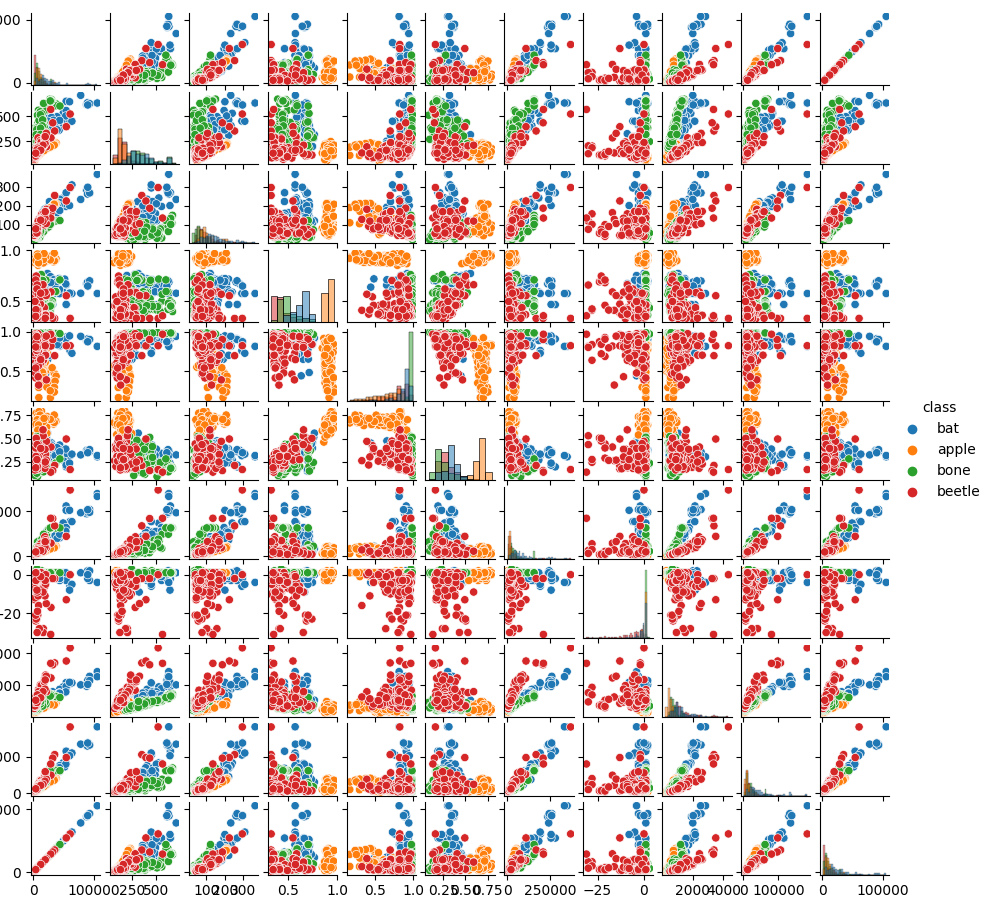

In [19]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(9, 9)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [20]:
feature_map_train_apple = np.array(feature_mat_train_apple)
feature_map_train_beetle = np.array(feature_mat_train_beetle)
feature_map_train_bat = np.array(feature_mat_train_bat)
feature_map_train_bone = np.array(feature_mat_train_bone)


In [21]:
labels = ['apple','beetle','bone','bat']
feature_map_train_mean = feature_map_train_apple.mean(0),feature_map_train_beetle.mean(0), feature_map_train_bone.mean(0), feature_map_train_bat.mean(0)
feature_map_train_std =  feature_map_train_apple.std(0),feature_map_train_beetle.std(0), feature_map_train_bone.std(0), feature_map_train_bat.std(0)

In [22]:
df = pd.DataFrame(feature_map_train_mean, columns=features)
df['class'] = labels
styles = [dict(selector="caption",props=[("text-align", "center"),("font-size", "150%"),("color", 'blue')])]
df = df.style.set_caption("Média das Características da Classe").set_table_styles(styles)

display(df)

,area,major_axis,minor_axis,solidity,eccentricity,extent,area_bbox,euler_number,perimeter_crofton,area_convex,area_filled,class
0,13415.666667,149.585312,108.929175,0.912685,0.645874,0.669274,20012.603175,0.380952,527.099475,14692.587302,13415.928571,apple
1,8817.968254,167.618334,90.369076,0.441510,0.794255,0.286675,34085.301587,-6.555556,1293.070059,20730.119048,8833.563492,beetle
2,11305.269841,371.080907,65.059872,0.503808,0.980000,0.250266,51099.134921,0.992063,796.960429,22700.230159,11305.269841,bone
3,28927.873016,358.960561,149.746771,0.640321,0.887066,0.335113,89603.214286,-0.293651,1177.485827,45956.134921,28928.238095,bat


In [23]:
df = pd.DataFrame(feature_map_train_std, columns=features)
df['class'] = labels
styles = [dict(selector="caption",props=[("text-align", "center"),("font-size", "150%"),("color", 'blue')])]
df = df.style.set_caption("Desvio Padrão das Características da Classe").set_table_styles(styles)

display(df)


,area,major_axis,minor_axis,solidity,eccentricity,extent,area_bbox,euler_number,perimeter_crofton,area_convex,area_filled,class
0,8500.997386,40.133177,41.426839,0.023956,0.186815,0.053993,12303.027595,1.030158,162.339095,9267.156901,8500.918711,apple
1,8953.315134,79.034167,43.241570,0.093152,0.144078,0.088462,44372.720676,7.204006,643.976789,23152.644933,8950.605694,beetle
2,8432.526992,133.900963,27.992012,0.091254,0.015702,0.093942,43397.098543,0.295362,259.906975,16710.818281,8432.526992,bone
3,22637.410280,130.885495,65.360855,0.072948,0.090805,0.074897,70790.477063,1.935743,472.670092,36715.547893,22637.659221,bat


In [24]:
df = pd.DataFrame(feature_map_train_std, columns=features)
df['class'] = labels
display(df.describe())

,area,major_axis,minor_axis,solidity,eccentricity,extent,area_bbox,euler_number,perimeter_crofton,area_convex,area_filled
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,12131.062448,95.988450,44.505319,0.070327,0.109350,0.077823,42715.830969,2.616317,384.723238,21461.542002,12130.427655
std,7008.042038,44.953389,15.478122,0.032228,0.073758,0.017790,23918.847320,3.131177,216.009922,11644.983594,7008.589667
min,8432.526992,40.133177,27.992012,0.023956,0.015702,0.053993,12303.027595,0.295362,162.339095,9267.156901,8432.526992
25%,8483.879787,69.308919,38.068132,0.060700,0.072029,0.069671,35623.580806,0.846459,235.515005,14849.902936,8483.820782
50%,8727.156260,104.959831,42.334204,0.082101,0.117442,0.081680,43884.909609,1.482950,366.288533,19931.731607,8725.762203
75%,12374.338920,131.639362,48.771391,0.091728,0.154763,0.089832,50977.159773,3.252809,515.496766,26543.370673,12372.369076
max,22637.410280,133.900963,65.360855,0.093152,0.186815,0.093942,70790.477063,7.204006,643.976789,36715.547893,22637.659221


# Transformada  de Características de Treino

In [25]:
# Transformada Normal de Caracteristicas de Treino
feature_map_norm_train = (feature_map_train - feature_map_train.mean(0)) / feature_map_train.std(0)


## Plotando as Características Transformadas

In [26]:
df_norm_1 = pd.DataFrame(feature_map_norm_train, columns=features)

df_norm_1['class'] = label_list_train
display(df_norm_1)

,area,major_axis,minor_axis,solidity,eccentricity,extent,area_bbox,euler_number,perimeter_crofton,area_convex,area_filled,class
0,0.531245,-0.065215,1.577340,0.162376,-0.996223,-0.028542,0.264064,0.283187,0.285545,0.394151,0.531052,bat
1,0.723971,1.388565,0.362762,-0.252940,0.775672,-0.169427,0.507078,0.283187,0.550137,0.787350,0.723802,bat
2,0.008568,0.373677,-0.058046,0.137974,0.688211,-0.132551,-0.093292,0.490036,-0.109232,-0.069741,0.008310,bat
3,0.990063,1.102446,1.545530,-0.183883,0.379097,-0.727552,1.391089,-0.130512,0.987561,1.013829,0.989926,bat
4,-0.541222,-0.363885,-0.618788,0.280134,0.661090,-0.410893,-0.473694,0.283187,-0.781738,-0.585285,-0.541547,bat
...,...,...,...,...,...,...,...,...,...,...,...,...
499,-0.704730,-0.874545,-0.647349,-1.053332,0.209124,-0.426362,-0.624082,-0.337362,0.001654,-0.568545,-0.704501,beetle
500,-0.580584,-0.918115,-0.493936,0.171783,-0.136107,0.265819,-0.622309,-5.922298,-0.009282,-0.607831,-0.577596,beetle
501,-0.604890,-0.657827,-0.842623,-0.022638,0.639780,-0.613298,-0.482983,-1.371609,-0.083983,-0.608019,-0.605159,beetle
502,-0.207444,-0.679341,0.365024,-0.232970,-1.021749,0.042969,-0.318689,0.076337,0.476869,-0.175609,-0.207664,beetle


# Transformada  de Características de Teste

In [27]:
# Converte a lista de caracteristicas de teste para um arranjo NumPy
feature_map_test = np.array(feature_mat_test)
# Transformada Normal de Caracteristicas de Teste
feature_map_norm_test = (feature_map_test - feature_map_test.mean(0)) / feature_map_test.std(0)

# Divisão dos Dados Classificaçãoção
Faz a seleção das características a serem usadas na classificação e a separação dos dados.

In [28]:
# Seleciona todas as características computadas
feature_map_ok_train = feature_map_train[0:]
feature_map_ok_test = feature_map_test[0:]

# Faz a separação Treino/Teste
X_train = feature_map_ok_train
X_test = feature_map_ok_test
y_train = label_list_train
y_test = label_list_test

# Normalização das Características
Realiza a normalização das características

In [29]:
# Média das caracteristicas do conjunto de treino
X_train_mean = X_train.mean(0)
# Desvio padrão das caracteristicas do conjunto de treino
X_train_std = X_train.std(0)

# Transformada Normal de Caracteristicas Manual
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std


# Montado o classificador
Para essa primeira classificação escolhemos o classificador SVM (SVC()) sem nenhum parâmetro

In [30]:
# Constrói um classificador do tipo SVM
classifier = SVC()

# Treinando o classificador
classifier.fit(X_train_norm, y_train)

# Testando o classificador
predition = classifier.predict(X_test_norm)

# Calcula a acc  para comparar
acc = metrics.accuracy_score(y_test, predition) 


# Avaliando o Desempenho do Classificador

In [31]:
# Acertos
acertos = y_test == predition
print("1 ---- Acerto")
print("0 ---- Erro\n")
print(acertos.astype(int))

err = 0
tr = 0
for v in acertos:
    if v == False:
        err+=1
    else:
        tr+=1
        
print("\nAcertos: " + str(tr))
print("Erros: " + str(err))

print("\nAcuracia:" +str(acc) )

1 ---- Acerto
0 ---- Erro

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Acertos: 216
Erros: 0

Acuracia:1.0


# Matriz de Confusão


Matriz de confusão:
[[54  0  0  0]
 [ 0 54  0  0]
 [ 0  0 54  0]
 [ 0  0  0 54]]


<IPython.core.display.Javascript object>


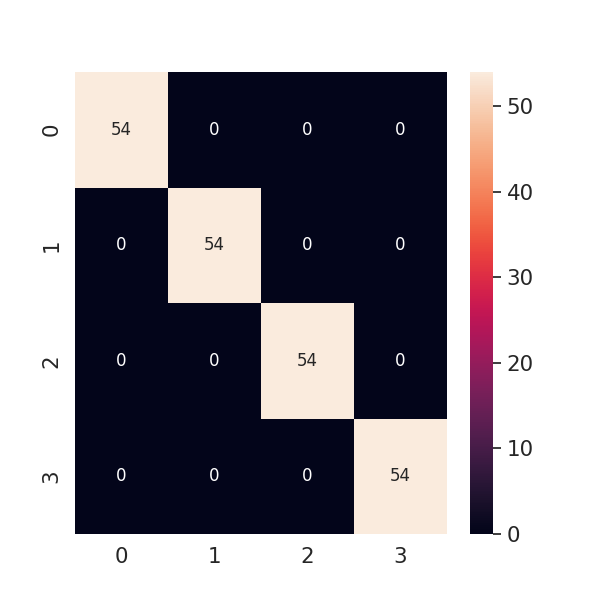

<AxesSubplot: >

In [32]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, predition))


matrix_confusion = metrics.confusion_matrix(y_test, predition)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.4)
sns.heatmap(matrix_confusion.tolist(), 
           annot=True, annot_kws={"size": 12}, fmt='d')

# Relátorio de Classificação


Relatório de classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        54
         bat       1.00      1.00      1.00        54
      beetle       1.00      1.00      1.00        54
        bone       1.00      1.00      1.00        54

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



<IPython.core.display.Javascript object>


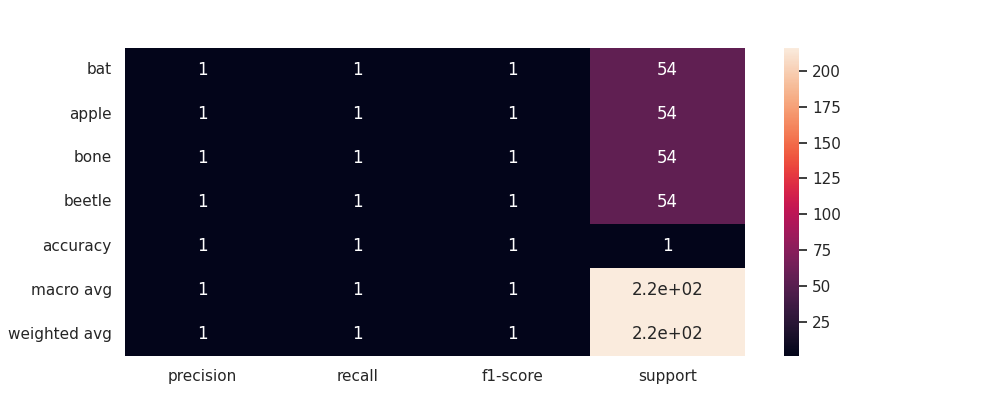

<AxesSubplot: >

In [33]:

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, predition))
clf_report = classification_report(y_test,
                                   predition,
                                   target_names=classes_list_train,
                                   output_dict=True)

plt.figure(figsize=(10, 4))
sns.set(font_scale=1)
sns.heatmap(pd.DataFrame(clf_report).iloc[:].T, annot=True,annot_kws={"size": 12})

# Otimização de Hiperâmetros
Fazemos modificações no valor C do classificador para encontrar uma melhor acurácia

In [34]:
# Selecionamos algumas características (1 até 9)
feature_map_otimize_train = feature_map_train[:,1:9]
feature_map_otimize_test = feature_map_test[:,1:9]

In [35]:
# Separa Treino/Teste
X_train_1 = feature_map_otimize_train
X_test = feature_map_otimize_test
y_train_1 = label_list_train
y_test = label_list_test

# Conjunto de Validação
Utilizamos o método train_test_split do Sklearn para fazer a divisão do conjunto de validação

In [36]:
X_train_2, X_val, y_train_2, y_val = model_selection.train_test_split(X_train_1, 
                                                                      y_train_1, 
                                                                      test_size=0.25, 
                                                                      stratify=y_train_1,
                                                                      random_state=393)

# Normalização
Fazemos a normalização das características através de métodos do Sklearn

In [37]:
# Média das caracteristicas do conjunto de treinamento
X_train_2_mean = X_train_2.mean(0)

# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_2_std = X_train_2.std(0)

In [38]:
# Transformada Normal de Caracteristicas (Sklearn)
scaler = preprocessing.StandardScaler().fit(X_train_2)
X_train_2_norm = scaler.transform(X_train_2)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

# Otimizando o valor do parâmetro de regularização do SVM (C)
Faremos um teste com valores do C variando de 10 à 1000

In [39]:
c_var = [1,5,10,30,50,100,200,350,500,1000]

In [40]:
# Lista com as acurácias de treino
acc_train_list = list()
# Lista com as acurácias de validação
acc_val_list = list()

for c in c_var:

    classifier = SVC(kernel='rbf', gamma = 'auto', C =c,random_state=393)
    classifier.fit(X_train_2_norm, y_train_2)

    # Testando o classificador (usando o conjunto de validação)
    pred = classifier.predict(X_val_norm)
    # Calcula a acc val para comparar
    acc_val = metrics.accuracy_score(y_val, pred)
    acc_val_list.append(acc_val)
    
    # Testando o classificador (usando o conjunto de treino)
    pred_train = classifier.predict(X_train_2_norm)
    # Calcula a acc train para comparar
    acc_train = metrics.accuracy_score(y_train_2, pred_train)
    acc_train_list.append(acc_train)  



<IPython.core.display.Javascript object>


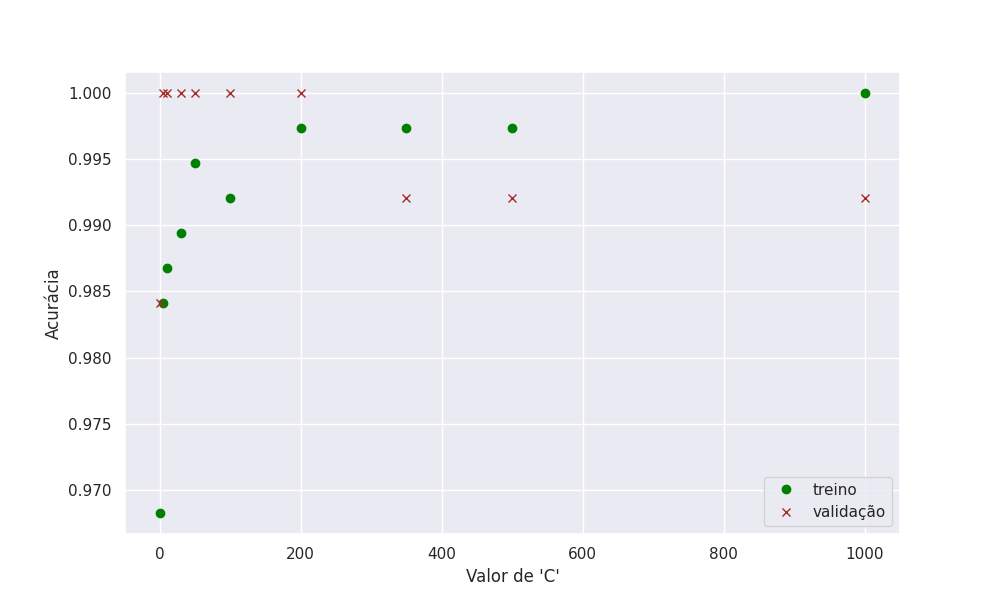

In [41]:
# Plota os valores de acuracia para C em treino e teste
plt.figure(figsize=(10, 6))

plt.plot(c_var, acc_train_list, 'o', color='green', label='treino')
plt.plot(c_var, acc_val_list, 'x', color='brown', label='validação')
plt.xlabel("Valor de 'C'")
plt.ylabel("Acurácia")
plt.legend(loc='best')

plt.show()

# Coleta dos Resultados
Faz a junção dos dos valores de C e seus resultados

In [42]:
lista = list()
for c_, acc_t, acc_v in zip(c_var, acc_train_list, acc_val_list):
    lista.append((int(c_), acc_t, acc_v))

# Valores de C  e Resultados de Acurácia

In [43]:
f = ['C_value','Acc_train','Acc_val']
lis = np.array(lista)
df_norm_1 = pd.DataFrame(lis, columns=f)
styles = [dict(selector="caption",props=[("text-align", "center"),("font-size", "150%"),("color", 'green')])]
df_norm_1 = df_norm_1.style.set_caption("C_VALUES").set_table_styles(styles)
display(df_norm_1)


,C_value,Acc_train,Acc_val
0,1.000000,0.968254,0.984127
1,5.000000,0.984127,1.000000
2,10.000000,0.986772,1.000000
3,30.000000,0.989418,1.000000
4,50.000000,0.994709,1.000000
5,100.000000,0.992063,1.000000
6,200.000000,0.997354,1.000000
7,350.000000,0.997354,0.992063
8,500.000000,0.997354,0.992063
9,1000.000000,1.000000,0.992063


# Escolha do melhor o valor de C
Considera-se o melhor valor de C levando em consideração tanto acurácia de treino e validação

In [44]:
acc_t_max = 0
acc_v_max = 0
c_max = 0
for c, acc_t,acc_v in lista:
    if c > c_max:
        if acc_t >= acc_t_max:
            if acc_v >= acc_v_max:
                c_max = c
                acc_v_max = acc_v
                acc_t_max = acc_t
c = list()
c.append((c_max,acc_t_max,acc_v_max))


In [45]:
f = ['C_Best','Acc_train','Acc_val']
lis = c
df_norm_1 = pd.DataFrame(lis, columns=f)
styles = [dict(selector="caption",props=[("text-align", "center"),("font-size", "150%"),("color", 'blue')])]
df_norm_1 = df_norm_1.style.set_caption("C_BEST").set_table_styles(styles)
display(df_norm_1)

,C_Best,Acc_train,Acc_val
0,200,0.997354,1.000000


# Construção de um novo classificador SVM, com o melhor valor de C

In [46]:
# Constrói um classificador SVM. Degree = Degree_max
otm_classifier = SVC(kernel='rbf', gamma = 'auto', C =c_max, random_state=393)

# Treinando o classificador
otm_classifier.fit(X_train_2_norm, y_train_2)

# Testando o classificador (usando o conjunto de TESTES)
predition = otm_classifier.predict(X_test_norm)

# Calcula Acurácia
acc_val = metrics.accuracy_score(y_test, predition)

# Matriz de Confusão

In [47]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, predition))


Matriz de confusão:
[[54  0  0  0]
 [ 0 54  0  0]
 [ 0  0 54  0]
 [ 0  0  0 54]]


<IPython.core.display.Javascript object>


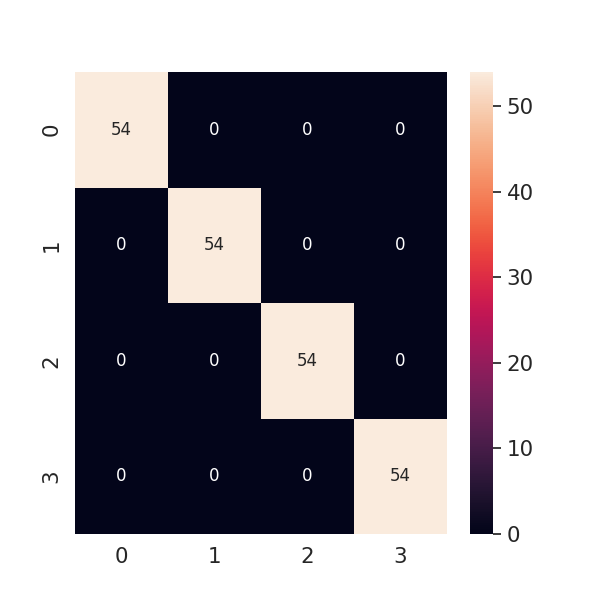

<AxesSubplot: >

In [48]:
matrix_confusion = metrics.confusion_matrix(y_test, predition)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.4)
sns.heatmap(matrix_confusion.tolist(), 
           annot=True, annot_kws={"size": 12}, fmt='d')

# Relatório de Classificação Final


Relatório de classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        54
         bat       1.00      1.00      1.00        54
      beetle       1.00      1.00      1.00        54
        bone       1.00      1.00      1.00        54

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



<IPython.core.display.Javascript object>


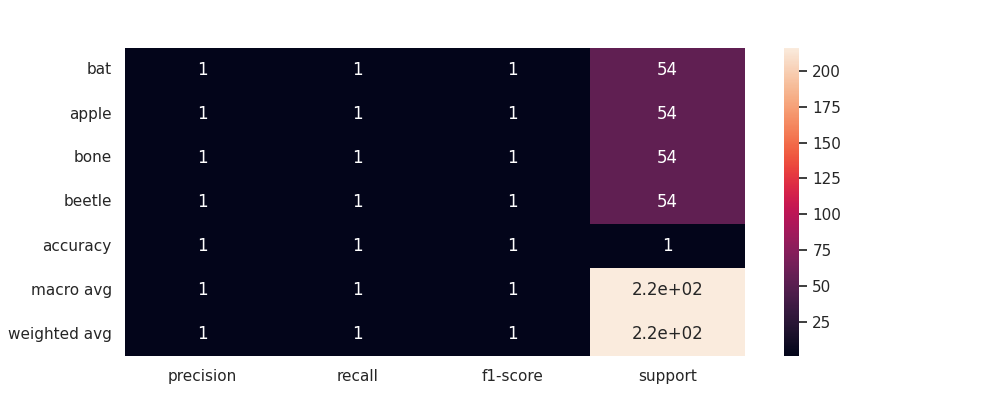

<AxesSubplot: >

In [49]:
print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, predition))
clf_report = classification_report(y_test,
                                   predition,
                                   target_names=classes_list_train,
                                   output_dict=True)
plt.figure(figsize=(10, 4))
sns.set(font_scale=1)
sns.heatmap(pd.DataFrame(clf_report).iloc[:].T, annot=True,annot_kws={"size": 12})